In [2]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np

This is a test markdown line

0    Polygon
dtype: object
{'init': 'epsg:32618'}
            minx          miny           maxx          maxy
0  732128.016925  4.713209e+06  732251.102892  4.713359e+06
                                            geometry  id
0  POLYGON ((732128.016925 4713359.17112, 732251....   1


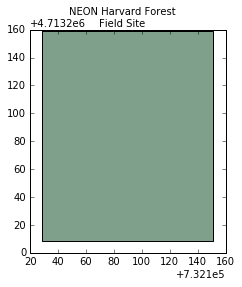

In [3]:
poly_harv = gpd.read_file('_data-jsta/HARV/HarClip_UTMZ18.shp')

print(poly_harv.geom_type)
print(poly_harv.crs)
print(poly_harv.bounds)

print(poly_harv.head())

poly_harv.plot(cmap = 'Greens')
plt.suptitle("NEON Harvard Forest\nField Site")
plt.show()


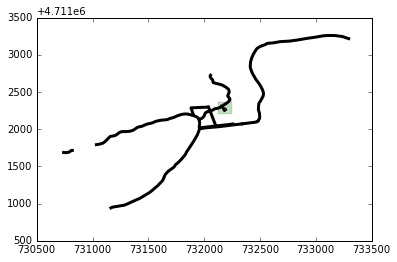

In [4]:
lines_harv = gpd.read_file('_data-jsta/HARV/HARV_roads.shp')
points_harv = gpd.read_file('_data-jsta/HARV/HARVtower_UTM18N.shp')

f, ax = plt.subplots(1)
for poly in poly_harv['geometry']:
	gpd.plotting.plot_multipolygon(ax, poly, facecolor = 'green', alpha = 0.25, linewidth = 0.1)
for line in lines_harv['geometry']:
	gpd.plotting.plot_multilinestring(ax, line, color = 'black', linewidth = 3)
for point in points_harv['geometry']:
 	gpd.plotting.plot_point(ax, point, color = 'purple')

plt.show()

# 

/home/jose/miniconda3/envs/fiona/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


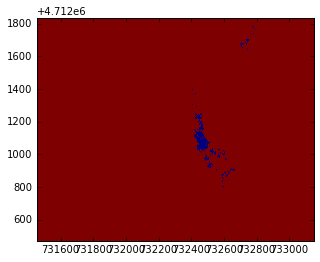

In [5]:
raster_harv = rasterio.open('_data-jsta/HARV/CHM/HARV_chmCrop.tif')
data = raster_harv.read()
data = np.transpose(data, [1,2,0])
xmin = raster_harv.transform[0]
xmax = raster_harv.transform[0] + raster_harv.transform[1] * raster_harv.width
ymin = raster_harv.transform[3] + raster_harv.transform[5] * raster_harv.height
ymax = raster_harv.transform[3]

plt.imshow(data[:,:,0], origin='upper', extent = [xmin, xmax, ymin, ymax], zorder = 1)

plt.show()